## Install and Import Dependenties

In [178]:
!pip install pandas
!pip install matplotlib

## Import Required Modules

In [179]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [182]:
## Let import the required dataset and we have two sheets in the excel ,so i will read only the required one.
## Task_1
survey = pd.read_excel("D:/IMS data/Job_Assignments/DHRUVA_TEST/Sample_Survey.xlsx",sheet_name= "Data")

In [183]:
## Lets read required file with the head or tail part to check whether survey data set is completly loaded or not.

survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [184]:
survey.tail() 

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
6862,6863,2020-09-01,Rural,10th Pass,"BPL/Below ₹ 5,000",JD(U),BJP,Fully Satisfied,Fully Dissatisfied,25,Male,166,Gen,0.036329
6863,6864,2020-09-01,Rural,Graduate,"BPL/Below ₹ 5,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,30,Male,169,BC,0.252780
6864,6865,2020-09-01,Urban,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),RJD,Can’t say,Fully Dissatisfied,20,Male,241,Gen,1.812926
6865,6866,2020-09-01,Rural,Professional Education,"₹ 10,000 - ₹ 20,000",BJP,Did not vote,Fully Satisfied,Somewhat Satisfied,23,Male,243,Gen,0.080137
6866,6867,2020-09-01,Rural,10th Pass,"₹ 5,000 - ₹ 10,000",JAP(L),JAP(L),Fully Satisfied,Fully Satisfied,33,Male,241,Gen,1.797518


In [185]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [186]:
## Here in the age column we have outlayer values in the row 124,where it shows object 
# insteaded of int, so we need to replace it correct input.
survey['age'].replace('24ko',24,inplace=True) 

In [187]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   int64         
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

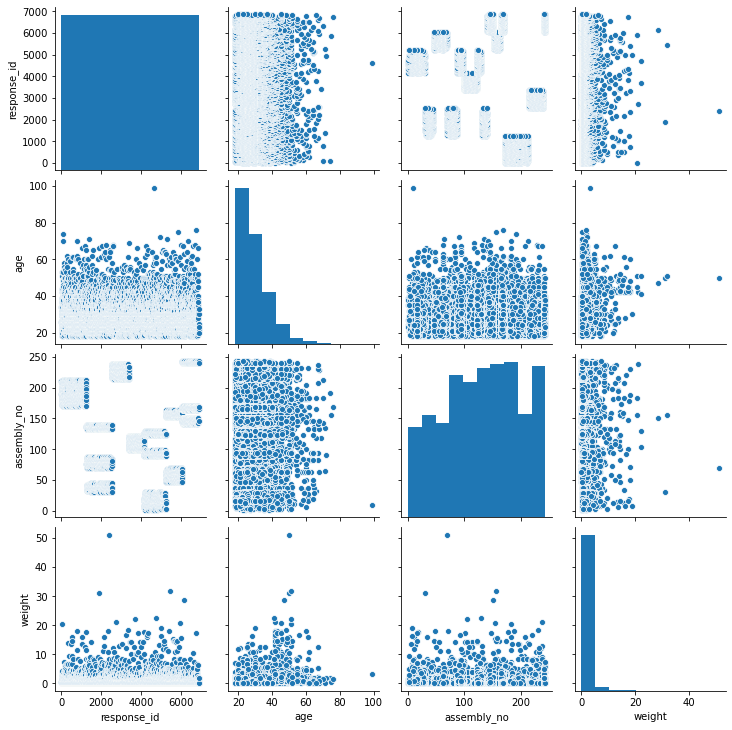

In [188]:
## Let plot the survey to check the data spreeded and need to for followin steps
sns.pairplot(survey)

In [189]:
## Task_2

# We need to find how many samples are collected on each day.
# lets make dataframe of columns id and ciollections date for easy 
#So lets apply some filters 

df=survey[["response_id","collection_date"]]

In [190]:
df

,response_id,collection_date
0,1,2020-08-24
1,2,2020-08-24
2,3,2020-08-24
3,4,2020-08-24
4,5,2020-08-24
...,...,...
6862,6863,2020-09-01
6863,6864,2020-09-01
6864,6865,2020-09-01
6865,6866,2020-09-01


In [191]:
df["year"]=df["collection_date"].dt.year
df["month"]=df["collection_date"].dt.month
df["day"]=df["collection_date"].dt.day
df

,response_id,collection_date,year,month,day
0,1,2020-08-24,2020,8,24
1,2,2020-08-24,2020,8,24
2,3,2020-08-24,2020,8,24
3,4,2020-08-24,2020,8,24
4,5,2020-08-24,2020,8,24
...,...,...,...,...,...
6862,6863,2020-09-01,2020,9,1
6863,6864,2020-09-01,2020,9,1
6864,6865,2020-09-01,2020,9,1
6865,6866,2020-09-01,2020,9,1


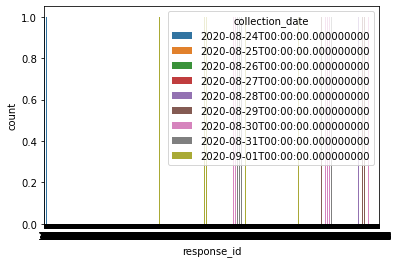

In [192]:
sns.countplot(x="response_id",hue="collection_date",data = df)
plt.show()

In [193]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   int64         
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [194]:
#From the above we are not able identify the no of sample per day,make another type of plot which hist.
#Here in "df" one column is of "int" and other coloun is of "datetime" format,so i cannnot perform the plot the graph between them,So i had made another df1 data frame where is ploted below.  


(array([1479.,  998.,  598.,  665.,    0.,  761.,  620.,  582.,  557.,
         607.]),
 array([737661. , 737661.8, 737662.6, 737663.4, 737664.2, 737665. ,
        737665.8, 737666.6, 737667.4, 737668.2, 737669. ]),
 <a list of 10 Patch objects>)

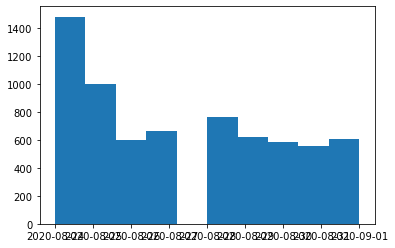

In [195]:
df1=df["collection_date"]
plt.hist(df1)

In [196]:
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

In [197]:
## Task-3
# Proportions of total responded were aged less than 45??


proportion = len(survey[survey['age'] < 45]) / len(survey)

proportion    ## So the responded were of aged is 93% onthe less than 45.  

0.9318479685452162

In [198]:
## Task-4
## We can make dictionary function
## or 
# #We need to creat dataframe with new column of age_group and bin it.
## Lets apply binning functon to make the new dataframe column.



In [199]:
# ans d
ml1=list(range(18,26))
mydict1=dict.fromkeys(ml1,'18-25')
ml2=list(range(25,41))
mydict2=dict.fromkeys(ml2,'25-40')
ml3=list(range(40,56))
mydict3=dict.fromkeys(ml3,'40-55')
ml4=list(range(56,100))
mydict4=dict.fromkeys(ml4,'55+')
mydict1.update(mydict2)
mydict1.update(mydict3)
mydict1.update(mydict4)
survey['age_group']=survey['age'].map(mydict1)

survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,age_group
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969,25-40
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419,25-40
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762,25-40
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298,25-40
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25


In [151]:
New_df = pd.DataFrame([18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,99], columns=['age'])

bins= [18,25,40,50,60,70,80,100]
labels = ['18-25', '25-40', '40-55', '55-65','65-70','70-99','100+']
New_df['age_group'] = pd.cut(New_df.age, bins, labels = labels,include_lowest = True)
print(New_df)

    age age_group
0    18     18-25
1    19     18-25
2    20     18-25
3    21     18-25
4    22     18-25
5    23     18-25
6    24     18-25
7    25     18-25
8    26     25-40
9    27     25-40
10   28     25-40
11   29     25-40
12   30     25-40
13   31     25-40
14   32     25-40
15   33     25-40
16   34     25-40
17   35     25-40
18   36     25-40
19   37     25-40
20   38     25-40
21   39     25-40
22   40     25-40
23   41     40-55
24   42     40-55
25   43     40-55
26   44     40-55
27   45     40-55
28   46     40-55
29   47     40-55
30   48     40-55
31   49     40-55
32   50     40-55
33   51     55-65
34   52     55-65
35   53     55-65
36   54     55-65
37   55     55-65
38   56     55-65
39   57     55-65
40   58     55-65
41   59     55-65
42   60     55-65
43   61     65-70
44   62     65-70
45   63     65-70
46   64     65-70
47   65     65-70
48   66     65-70
49   67     65-70
50   68     65-70
51   69     65-70
52   70     65-70
53   71     70-99
54   72   

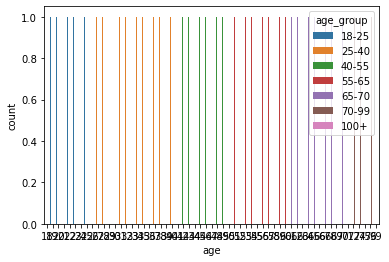

In [152]:
## Task_5
# We need to find the samples and which age group


sns.countplot(x="age",hue="age_group",data = New_df)
plt.show()


In [153]:
#From the above plot we say that age_group of "25-40" that is "Orange Color" 
# has high range of ages.
# And when apply value counts fuction we will get like below one 

New_df['age_group'].value_counts() ## 25-40 age_group

25-40    15
65-70    10
55-65    10
40-55    10
18-25     8
70-99     5
100+      1
Name: age_group, dtype: int64

In [154]:
## Task-6

## What proportion did the responded opted RJD in both Vote_Now and Past_Vote
## We need to used logical operators

In [155]:
proportion=len(survey[(survey['Vote_Now']=='RJD')  & (survey['Past_Vote']=='RJD')])/len(survey)

# We need to calculate the percentage of responded for RJD in the both times.

print('There are {}% RJD in both the elections vote_now and past_vote'.format(proportion*100))

There are 11.810106305519149% RJD in both the elections vote_now and past_vote


In [157]:
## Task-7

## Here we need to calculate CM's fully satisfied voters ,tabular form 
#by using Lamda function .
#### From the below Table and plot we can say "2020-09-01" has highest samples 
survey.groupby(by='collection_date')[['CM_satisfaction']].apply(lambda x:np.sum(x=='Fully Satisfied')/len(x)*100)

,CM_satisfaction
collection_date,
2020-08-24,9.871535
2020-08-25,9.519038
2020-08-26,9.866221
2020-08-27,8.120301
2020-08-28,12.089356
2020-08-29,11.774194
2020-08-30,11.168385
2020-08-31,11.131059
2020-09-01,12.355848


                 MLA_satisfaction
collection_date                  
2020-08-24              59.972955
2020-08-25              63.126253
2020-08-26              59.030100
2020-08-27              60.601504
2020-08-28              60.709593
2020-08-29              56.451613
2020-08-30              62.027491
2020-08-31              57.630162
2020-09-01              63.426689


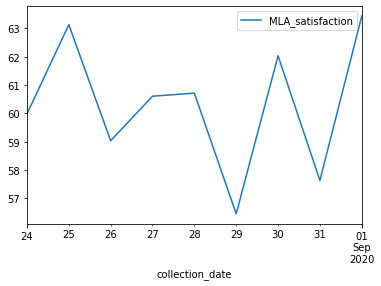

In [163]:
## Task_8
## Similar steps for the dis-satisfaction with the MLA and line plot
## we need to import datetime library for line plot....

Dis_table = pd.DataFrame(survey.groupby(by='collection_date')[['MLA_satisfaction']].apply(lambda x:np.sum(x=='Fully Dissatisfied')/len(x)*100))

print(Dis_table)

import datetime
Dis_table.index.date
Dis_table.plot()


In [167]:
## Task-9
## df.pivot_table(index='make', columns='body_style', aggfunc={'body_style':len}, fill_value=0)

pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='count',values='response_id')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,3.0,0.0,1165.0,2.0,5.0,31.0,54.0,75.0,25.0,7.0,136.0,23.0,52.0,276.0,40.0,13.0,49.0,4.0
BSP,NaN,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,5.0,1.0,48.0,0.0,0.0,4.0,8.0,16.0,5.0,1.0,18.0,3.0,5.0,27.0,5.0,1.0,8.0,0.0
HAM,0.0,NaN,18.0,NaN,1.0,NaN,2.0,2.0,1.0,NaN,3.0,NaN,NaN,5.0,3.0,NaN,0.0,NaN
INC,NaN,4.0,2.0,NaN,NaN,43.0,7.0,6.0,NaN,1.0,4.0,3.0,2.0,70.0,1.0,2.0,6.0,NaN
JAP(L),NaN,NaN,3.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN
JD(U),4.0,6.0,179.0,2.0,0.0,33.0,47.0,177.0,16.0,6.0,51.0,13.0,24.0,316.0,8.0,17.0,27.0,5.0
LJP,NaN,NaN,61.0,0.0,NaN,4.0,2.0,5.0,6.0,1.0,2.0,NaN,2.0,14.0,0.0,NaN,1.0,NaN
Left Front,NaN,0.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,12.0,0.0,0.0,NaN,4.0,NaN,1.0,NaN,1.0


In [168]:
## Task_10 
## Same  fuction is done and repeated for the sum of weights

pd.pivot_table(data=survey,index='Past_Vote',columns='Vote_Now',aggfunc='sum',values='weight')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,4.807335,0.349996,1049.344112,0.452551,10.171283,50.055502,63.832368,68.029581,45.716215,7.537394,114.913686,8.790137,50.016163,250.948101,16.047570,18.715113,41.286954,18.691691
BSP,NaN,1.654731,5.174487,32.010277,NaN,2.298223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.865896,5.379527,114.203906,3.329611,2.497170,27.791290,26.359190,58.983458,11.801813,13.050113,44.725179,7.289933,25.319524,173.882525,4.349832,5.041587,22.015457,10.696552
HAM,0.312607,NaN,25.348884,NaN,1.648856,NaN,0.712161,1.006719,2.496424,NaN,0.928984,NaN,NaN,7.713008,1.903148,NaN,0.039564,NaN
INC,NaN,11.105958,1.642875,NaN,NaN,161.742302,18.942597,11.077323,NaN,6.268726,5.999014,1.552038,1.588527,195.020050,5.340403,1.140299,8.558475,NaN
JAP(L),NaN,NaN,6.512846,NaN,NaN,NaN,57.876224,NaN,NaN,NaN,NaN,3.195682,NaN,2.164824,NaN,NaN,NaN,NaN
JD(U),12.457216,29.198610,156.243100,11.005903,2.639574,91.806261,106.217216,498.796862,33.148113,11.765603,61.109706,29.196072,45.175289,657.155514,4.015909,44.376194,58.137833,20.675288
LJP,NaN,NaN,85.010450,2.481377,NaN,21.613385,7.375946,11.382812,26.868529,1.712452,0.813171,NaN,1.927965,30.737989,0.478933,NaN,1.709409,NaN
Left Front,NaN,2.298223,0.209586,NaN,NaN,2.291368,NaN,NaN,NaN,44.280864,0.201455,8.309203,NaN,6.740281,NaN,0.877960,NaN,3.020887


In [200]:
### Task-11

## We need to create a dataframe by performing groupby function for age_group and response_id 

df4=pd.DataFrame(survey.groupby(by="age_group")["response_id"].agg("count"))

print(df4)

           response_id
age_group             
18-25             2094
25-40             3844
40-55              821
55+                108


In [201]:
###Task-12

## We need to create a dataframe by performing groupby function for age_group and find the
## count of each age_group where opted for JDU in Vote_Now

df5=pd.DataFrame(survey.groupby(by="age_group")["Vote_Now"].apply(lambda x:np.sum(x=="JD(U)")))

print(df5)



           Vote_Now
age_group          
18-25           181
25-40           264
40-55            71
55+              10


In [203]:
### Task-13

# Join/Merge the two dataframes from Task-12 and Task-11 with the common column 
# age_group.

df_inner = pd.merge(df4, df5, on='age_group', how='inner')
df_inner

,response_id,Vote_Now
age_group,,
18-25,2094,181
25-40,3844,264
40-55,821,71
55+,108,10


In [ ]:
### Finnally EDA is completed .